In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#For standardization
from sklearn import preprocessing
#For dividing the dataset into train and test sets  
from sklearn.model_selection import train_test_split    
#For checking MSE and r^2 values   
from sklearn.metrics import r2_score, mean_squared_error
#For the OLS results
from sklearn.linear_model import LinearRegression  

In [2]:
#load avertising data
df = pd.read_csv("data/Advertising.csv")
#print size
print("Data size is: ", df.shape)
#display first five rows of the data
df.head()

Data size is:  (200, 5)


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.describe() # describe functions is used to get the summary of the data


,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Standardizing columns of the dataset.

In [4]:
temp_data = df.copy() # temporary dataset containing standarized values

# tv standardized values
tv_mean = temp_data['TV'].mean()
tv_std = temp_data['TV'].std()
temp_data['TV'] = (temp_data['TV'] - tv_mean) / tv_std

# radio standardized values
radio_mean = temp_data['Radio'].mean()
radio_std = temp_data['Radio'].std()
temp_data['Radio'] = (temp_data['Radio'] - radio_mean) / radio_std

# newspater standardized values
news_mean = temp_data['Newspaper'].mean()
news_std = temp_data['Newspaper'].std()
temp_data['Newspaper'] = (temp_data['Newspaper'] - news_mean) / news_std

# sales standardized values
sales_mean = temp_data['Sales'].mean()
sales_std = temp_data['Sales'].std()
temp_data['Sales'] = (temp_data['Sales'] - sales_mean) / sales_std

temp_data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,0.967425,0.979066,1.774493,1.548168
1,2,-1.194379,1.080097,0.667903,-0.694304
2,3,-1.512360,1.524637,1.779084,-0.905135
3,4,0.051919,1.214806,1.283185,0.858177
4,5,0.393196,-0.839507,1.278593,-0.215143
...,...,...,...,...,...
195,196,-1.267759,-1.317724,-0.769287,-1.230964
196,197,-0.615491,-1.236899,-1.031011,-0.828469
197,198,0.348934,-0.940539,-1.109069,-0.234310
198,199,1.590574,1.261955,1.636743,2.199827


Acquired data used with sklearn.

In [5]:
# sklearn preprocessing.scale function
df_standardize = preprocessing.scale(df)

#Convert standardized data to dataset
df_standardize = pd.DataFrame(df_standardize, columns = df.columns)

df_standardize

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,-1.723412,0.969852,0.981522,1.778945,1.552053
1,-1.706091,-1.197376,1.082808,0.669579,-0.696046
2,-1.688771,-1.516155,1.528463,1.783549,-0.907406
3,-1.671450,0.052050,1.217855,1.286405,0.860330
4,-1.654129,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...,...
195,1.654129,-1.270941,-1.321031,-0.771217,-1.234053
196,1.671450,-0.617035,-1.240003,-1.033598,-0.830548
197,1.688771,0.349810,-0.942899,-1.111852,-0.234898
198,1.706091,1.594565,1.265121,1.640850,2.205347


Adding extra column composing of all ones to X.

In [6]:
df_standardize.insert(0, 'all_ones', 1)
df_standardize

,all_ones,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,-1.723412,0.969852,0.981522,1.778945,1.552053
1,1,-1.706091,-1.197376,1.082808,0.669579,-0.696046
2,1,-1.688771,-1.516155,1.528463,1.783549,-0.907406
3,1,-1.671450,0.052050,1.217855,1.286405,0.860330
4,1,-1.654129,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...,...,...
195,1,1.654129,-1.270941,-1.321031,-0.771217,-1.234053
196,1,1.671450,-0.617035,-1.240003,-1.033598,-0.830548
197,1,1.688771,0.349810,-0.942899,-1.111852,-0.234898
198,1,1.706091,1.594565,1.265121,1.640850,2.205347


 Divide the dataset into training and testing, with 0.85 and 0.25 ratio, respectively.

In [7]:
# type of advertising selection
attribute = df_standardize[['all_ones', 'TV', 'Radio', 'Newspaper']]
target = df_standardize['Sales'] # target - sales column dependent variable
# 0.85 ratio for training and 0.25 ratio for testing
X_train, X_test, y_train, y_test = train_test_split(attribute, target, train_size = 0.75, test_size = 0.25)


ratio is changed to 0.75 for training because 0.85 causes an error

Fit the model on the training set. Required Functions

 initialize_weights

In [8]:
def initialize_weights(X, random = False):
    X_len = X.shape[1] # number of columns in x is equal to the weight lengths
    if random: # if the length is random, it will be initialized randomly too
        return np.random.rand(X_len)
    return np.zeros(X_len) # else return zero or initialized to zero

In [9]:
# function testing
weight = initialize_weights(X_train, random = True)
weight

array([0.25595041, 0.11404669, 0.84757748, 0.42374052])

In [10]:
weight = initialize_weights(X_train)
weight

array([0., 0., 0., 0.])

predict: returns a vector of the predicted values 

In [11]:
def predict(X, weight):
    #Using numpy's dot product function to multiply every weight to its interrelated feature from x
    return np.dot(X, weight)

In [12]:
#Predict the training set's values using a random set of weights
yhat_train = predict(X_train, initialize_weights(X_train, random = True))

# comparing predicted and actual values
df_train = pd.DataFrame({'Actual Values': y_train, 'Predicted Values': yhat_train})
df_train


,Actual Values,Predicted Values
5,-1.310911,1.738111
98,2.186132,2.730868
75,-1.022693,1.990372
156,0.245466,1.373593
32,-0.849762,-1.096295
...,...,...
113,0.360753,-0.013822
58,1.878700,2.097531
8,-1.772059,-2.559240
12,-0.926620,0.955927


compute_cost: returns a scalar value that tells us how accurate the model is.

In [13]:
def compute_cost(X, y, weight):
    x = len(y) # length of the response
    
    cost_function = 1/(2*x) * np.sum((predict(X, weight) - y)**2) # formula for the cost
    return cost_function

In [14]:
#Print the cost function of the training set utilizing a random set of weights
cost_train = compute_cost(X_train, y_train, initialize_weights(X_train, random = True))
print(cost_train)

0.6826796325514061


compute_gradient:

In [15]:
def compute_gradient(X, y, weight):
    x = len(y)
    z = 1/x * np.dot(X.T, (predict(X, weight) - y))
    return z #returns matrix z

update_weights: returns a 4x1 matrix that contains the updated weights. 

In [16]:
def update_weights(X, y, weight, alpha):
    return weight - alpha * compute_gradient(X, y, weight)

grad_descent: returns 2 matrices: one matrix for the weights, and one matrix for the 
cost values per iteration.

In [17]:
def grad_descent(X, y, weight, alpha, iterations):  #Initialization of the two matrices
    weight_matrix = [0] * iterations 
    cost_matrix = [0] * iterations

    for j in range(iterations):  # Looping through the no. of iterations and utilizing batch gradient descent
        weights = update_weights(X, y, weight, alpha)     #Updating weights
        weight_matrix[j] = weight #Store the weights in the weights matrix
        cost = compute_cost(X, y, weight)  #Computing cost
        cost_matrix[j] = cost  #Store the cost in the cost matrix
    return weight_matrix, cost_matrix

plot_costs: plot the costs as a function of iteration.

In [18]:
def plot_costs(cost_array): #Size of the plot
    plt.figure(figsize=(15,8))
    plt.plot(cost_array)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost over Iterations')
    plt.show()

Predict y for train set and calculate the cost.

In [19]:
weight = initialize_weights(X_train, random = True)
yhat_train = predict(X_train, weight)
yhat_train_df = pd.DataFrame({'Actual Values': y_train, 'Predicted Values': yhat_train})
yhat_train_df

,Actual Values,Predicted Values
5,-1.310911,1.837667
98,2.186132,2.466013
75,-1.022693,2.361508
156,0.245466,1.327256
32,-0.849762,0.007256
...,...,...
113,0.360753,0.178363
58,1.878700,1.596989
8,-1.772059,-1.595078
12,-0.926620,1.395050


In [20]:
# formula for getting the cost of the predicted values
train_cost = compute_cost(X_train, y_train, weight)
train_cost

0.5761549626936115

Predict y for test set and calculate the cost.

In [21]:
weight = initialize_weights(X_test, random = True)
yhat_test = predict(X_test, weight)
yhat_test_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': yhat_test})
yhat_test_df['Residual Values'] = yhat_test_df['Actual Values'] - yhat_test_df['Predicted Values']
yhat_test_df

,Actual Values,Predicted Values,Residual Values
55,1.859486,1.434325,0.425161
124,1.090905,0.904674,0.186231
126,-1.426198,0.928205,-2.354403
142,1.167763,0.837414,0.330349
100,-0.446257,-0.120488,-0.325770
169,0.187822,0.024613,0.163209
192,-1.560700,-0.305422,-1.255277
13,-0.830548,-0.196053,-0.634495
19,0.110964,0.424214,-0.313250
56,-1.637558,0.534762,-2.172319


In [22]:
# formula for getting the cost of the predicted values
test_cost = compute_cost(X_test, y_test, weight)
test_cost

0.4171176093113547

Application Part 6: Predict the quantitative response y on the train set. Evaluate performance. You can use 
the MSE cost function defined for the gradient descent.

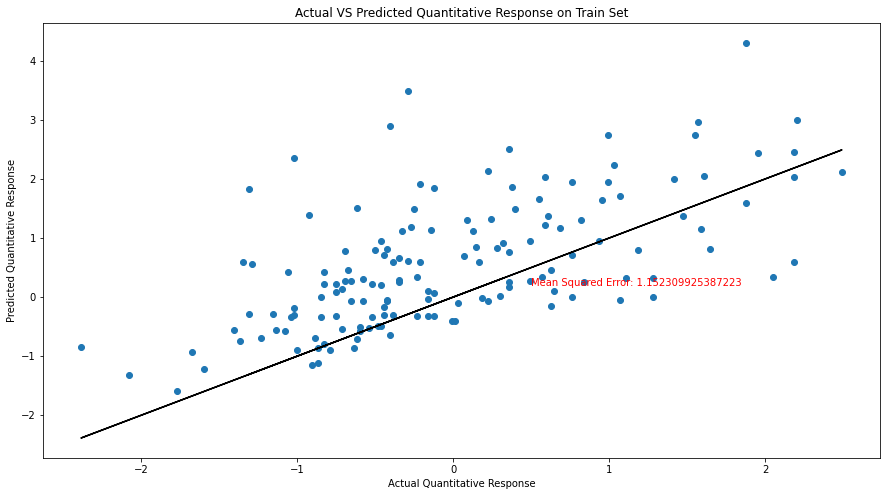

In [23]:
weight = initialize_weights(X_train, random = True)

# variable for alpha and iteration
alpha = 0.01
iterations = 10000  

# running gradient descent algorithm for training and testing
weight_matrix_training, cost_matrix_training = grad_descent(X_train, y_train, weight, alpha, iterations)
weight_matrix_testing, cost_matrix_testing = grad_descent(X_test, y_test, weight, alpha, iterations)

# predicting the quantitative response using the train set
y_hat_train = predict(X_train, weight_matrix_training[-1])

# plotting the actual and predicted response of the train set
plt.figure(figsize=(15,8))
plt.xlabel('Actual Quantitative Response')
plt.ylabel('Predicted Quantitative Response')
plt.title('Actual VS Predicted Quantitative Response on Train Set')
plt.scatter(y_train, yhat_train)
plt.plot(y_train, y_train, color="black")
plt.text(0.5, 0.20, f"Mean Squared Error: {mean_squared_error(y_train, yhat_train)}", color='red')
plt.show()

Evaluation: We can see that the mean squared error is 1.15. This means that values closer to 0 indicates how accurate the model is meaning this model could be considered good since 1.15 is close to 0.

Application Part 7: predict the quantitative response y on the test set. Evaluate performance. Similarly, you can use the MSE cost function defined for the gradient descent.

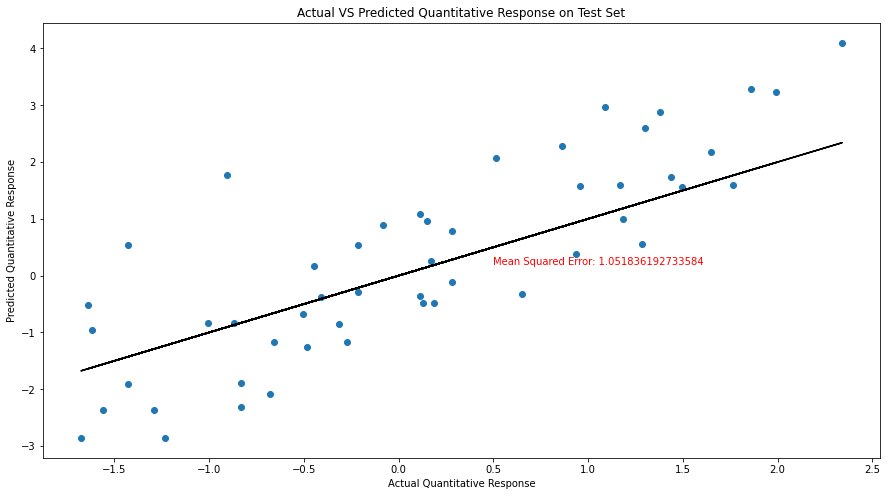

In [24]:
# predicting the quantitative response using the test set this time
yhat_test = predict(X_test, weight_matrix_training[-1])

# plotting the actual and predicted response of the test set
plt.figure(figsize=(15,8))
plt.xlabel('Actual Quantitative Response')
plt.ylabel('Predicted Quantitative Response')
plt.title('Actual VS Predicted Quantitative Response on Test Set')
plt.scatter(y_test, yhat_test)
plt.plot(y_test, y_test, color="black")
plt.text(0.5, 0.20, f"Mean Squared Error: {mean_squared_error(y_test, yhat_test)}", color='red')
plt.show()

Evaluation: The Mean squared error is 1.051. This means that the model is a little accurate this time because the mse in the test set is lesser than the train set and was able to predict it with great accuracy.

Application Part 8: Predict the sales on the actual data set this time.

In [25]:
df_standardize

# adding a new column for the earlier sales prediction
df_standardize['Predicted Sales'] = predict(df_standardize[['all_ones', 'TV', 'Radio', 'Newspaper']], weight_matrix_training[-1])

# reverting the data back into its original state
df_standardize['TV'] = df_standardize['TV'] * df['TV'].std() + df['TV'].mean()
df_standardize['Radio'] = df_standardize['Radio'] * df['Radio'].std() + df['Radio'].mean()
df_standardize['Newspaper'] = df_standardize['Newspaper'] * df['Newspaper'].std() + df['Newspaper'].mean()
df_standardize['Sales'] = df_standardize['Sales'] * df['Sales'].std() + df['Sales'].mean()
df_standardize['Predicted Sales'] = df_standardize['Predicted Sales'] * df['Sales'].std() + df['Sales'].mean()

# residual column for the sales - the predicted sales
df_standardize['Residuals'] = df_standardize['Sales'] - df_standardize['Predicted Sales']

# remove all_ones column
df_standardize.drop('all_ones', axis = 1, inplace = True)

df_standardize

,Unnamed: 0,TV,Radio,Newspaper,Sales,Predicted Sales,Residuals
0,-1.723412,230.308426,37.836477,69.296979,22.120270,30.462085,-8.341816
1,-1.706091,44.242678,39.340241,45.136502,10.390910,17.639821,-7.248911
2,-1.688771,16.874171,45.956803,69.397230,9.288149,23.315359,-14.027210
3,-1.671450,151.511186,41.345260,58.570128,18.511236,25.914567,-7.403332
4,-1.654129,180.884712,10.768723,58.469877,12.897183,16.845328,-3.948145
...,...,...,...,...,...,...,...
195,1.654129,37.926869,3.650906,13.757957,7.583883,-0.885242,8.469126
196,1.671450,94.067396,4.853917,8.043654,9.689153,1.031340,8.657813
197,1.688771,177.075176,9.264959,6.339388,12.796932,6.067191,6.729742
198,1.706091,283.942679,42.047016,66.289451,25.528802,33.810465,-8.281663


Application Part 9: Observe the cost results and analyse.

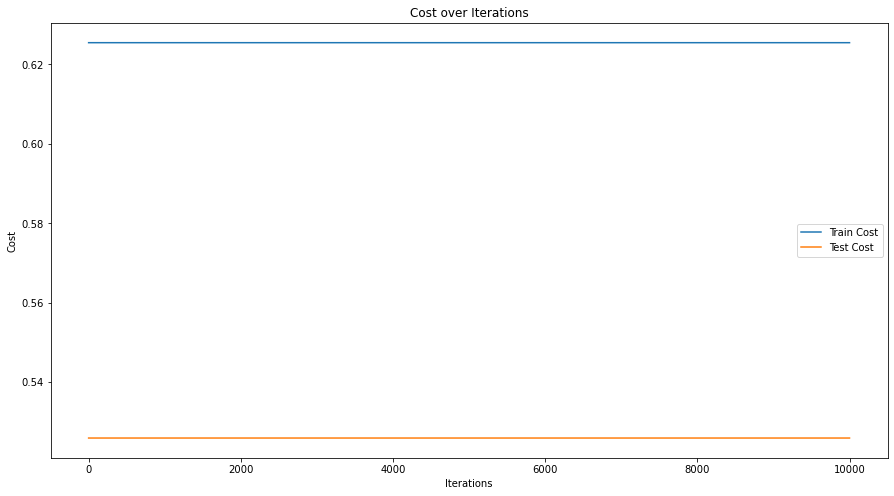

In [26]:
plt.figure(figsize=(15,8))
plt.plot(cost_matrix_training, label='Train Cost')
plt.plot(cost_matrix_testing, label='Test Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over Iterations')
plt.legend()
plt.show()

What I can see here in the plot is that the model becomes less accurate if there is only less iterations.

Additional Questions:

1. What are the optimal weights found by your implemented gradient descent? Plug it into the linear model:
What are your interpretations regarding the formed linear model?

In [27]:
w = initialize_weights(X_train)

alpha = 0.01    
iterations = 50000                                                  


we, co = grad_descent(X_train, y_train, w, alpha, iterations)

optimal_weights = we[-1]


print(f"Optimal Weights: {optimal_weights}") #Printing the optimal weights

#Plugging it into the linear model
print(f"hΘ(x) = {optimal_weights[0]} + {optimal_weights[1]}*TV + {optimal_weights[2]}*Radio + {optimal_weights[3]}*Newspaper")

Optimal Weights: [0. 0. 0. 0.]
hΘ(x) = 0.0 + 0.0*TV + 0.0*Radio + 0.0*Newspaper


2. Provide a scatter plot

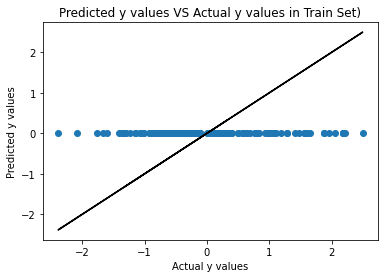

In [28]:
predict_train = predict(X_train, optimal_weights)
plt.scatter(y_train, predict_train)
plt.xlabel('Actual y values')
plt.ylabel('Predicted y values')
plt.title('Predicted y values VS Actual y values in Train Set)')
plt.plot(y_train, y_train, color='Black')
plt.show()

Is there a trend? Provide an r2 score

In [29]:
print(f"The r2 score is {r2_score(y_train, predict_train)}")

The r2 score is -0.0010507391177423386


3. What happens to the error, r2, and cost as the number of iterations increase? Show your 
data and proof. You can alternatively plot your result data for visualization and check 
until 50000 iterations or more (actually)

In [ ]:
MSE_arr = []
for j in range(iterations):
    MSE = mean_squared_error(y_train, predict(X_train, we[j]))
    MSE_arr.append(MSE)


plt.figure(figsize=(15,8))
plt.plot(MSE_arr[0:1000])
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.xticks(np.arange(0, 1000, 100))
plt.show()

4. Once you determine the optimal number of iterations, check the effect on the cost and 
error as you change the learning rate. The common learning rates in machine learning 
include 0.1, 0.01, 0.001, 0.0001, 0.2 but you have the option to include others. Visualize
the cost function (vs the optimal number of iterations) of each learning rate in ONLY ONE 
PLOT. Provide your analysis.

In [ ]:
r2_arr = []
for j in range(iterations):
    r2 = r2_score(y_train, predict(X_train, we[j]))
    r2_arr.append(r2)

plt.figure(figsize=(15,8))
plt.plot(r2_arr)
plt.xlabel('Iterations')
plt.ylabel('r^2 score')
plt.title('r^2 score over Iterations')
plt.yticks(np.arange(0, 1, 0.05))
plt.axhline(y=max(r2_arr), color='black')
plt.show()

print(f"The maximum r^2 score is {max(r2_arr)}")

In [ ]:
# cost over iterations plot
plot_costs(co)

In [ ]:
# number of optimal iterations
def optimal_iterations(max_r2, r2_arr):
    for j in range(len(r2_arr)):
        if r2_arr[j] == max_r2:
            return j

optimal_num = optimal_iterations(max(r2_arr), r2_arr)
print(f"The optimal number of iterations is {optimal_num}")

In [ ]:
# determining the cost and weights at the optimal iterations and 
print(f"The cost at the optimal number of iterations is {co[optimal_num]}")
print(f"The weights at the optimal number of iterations are {we[optimal_num]}\n")
#Last iteration
print(f"The cost at the last iteration is {co[-1]}")
print(f"The weights at the last iteration are {we[-1]}")

In [ ]:
#Optimized Gradient Descent Algorithm
def optimized_gda(X, y, weights, alpha, iterations, diff_threshold):
    last_iter = 0
    we = []
    co = []

    for j in range(iterations):
        weights = update_weights(X, y, weights, alpha)
        we.append(weights)
        cost = compute_cost(X, y, weights)
        co.append(cost)

        if j > 0 and diff_threshold > abs(co[j] - co[j - 1]):
            last_iter = j
            break
        last_iter = j
    
    return we, co, last_iter

iterations = 50000
alpha = 0.01

diff_threshold = 1.0e-15

we, co, optimal_iterations = optimized_gda(X_train, y_train, w, alpha, iterations, diff_threshold)

plot_costs(co)

4 . Once you determine the optimal number of iterations, check the effect on the cost and 
error as you change the learning rate. The common learning rates in machine learning 
include 0.1, 0.01, 0.001, 0.0001, 0.2 but you have the option to include others. Visualize
the cost function (vs the optimal number of iterations) of each learning rate in ONLY ONE 
PLOT. Provide your analysis.

In [ ]:
w = initialize_weights(X_train)

iterations = optimal_iterations

learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.2]

cost_dict = {j:0 for j in learning_rates}
error_dict = {j:0 for j in learning_rates}
co_dict = {j:[] for j in learning_rates}

for alpha in learning_rates:
    we, co = grad_descent(X_train, y_train, w, alpha, iterations)
    cost_dict[alpha] = co[-1]
    from sklearn.metrics import mean_squared_error
    error_dict[alpha] = mean_squared_error(y_train, predict(X_train, we[-1]))
    co_dict[alpha] = co

plt.figure(figsize=(18,6))
for alpha in learning_rates:
    plt.plot(co_dict[alpha], label = alpha)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over iterations for each learning rate')
plt.legend()
plt.show()

In [ ]:
learning_rates = pd.DataFrame({'Learning Rate': list(cost_dict.keys()), 'Cost': list(cost_dict.values()), 'Error': list(error_dict.values())})
learning_rates

5. Is there a relationship on the learning rate and the number of iterations?

 6. Compare the results with the results of ordinary least squares function. 